# Example Jupyter notebook 

This Jupyter/IPython notebook demonstrates the use of PmagPy functions within a notebook environment. The benefits of working within these notebooks include but are not limited to scientific reproducibility; coherent code development; convenient workspace for projects; version control (when integrated with GitHub or other version control software).

Note: this notebook makes heavy use of the pandas Dataframe

In [76]:
import sys, os
#change to match where the PmagPy folder is on your computer
#sys.path.insert(0, '/Users/Laurentia/PmagPy')
#sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/PmagPy/')
# USING FAIRCHILD FORK OF PMAGPY -- CONTINUAL PULL REQUESTS ARE MADE TO PMAGPY MASTER BUT MAY NOT BE UPDATED YET
sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/fairchild_PmagPy/')
import pmag, pmagplotlib, ipmag, ipmagplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The dipole equation

In [15]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

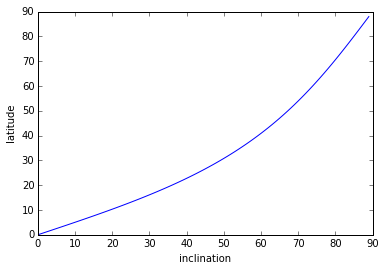

In [16]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

## Angle between directions

In [17]:
direction1 = [150,-40]
direction2 = [120,60]

pmag.angle(direction1,direction2)

array([ 103.00072744])

## Generate and plot Fisher distributed unit vectors from a specified distribution

In [18]:
fisher_directions = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,206.912613,32.065105,1
1,174.458723,40.268178,1
2,192.188496,34.981356,1
3,205.319099,35.430221,1
4,205.883622,24.054069,1


In [19]:
mean = ipmag.fisher_mean(directions.dec,directions.inc)
ipmag.print_direction_mean(mean)

Dec: 202.0  Inc: 30.5
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.3
Precision parameter (k) estimate: 37.8


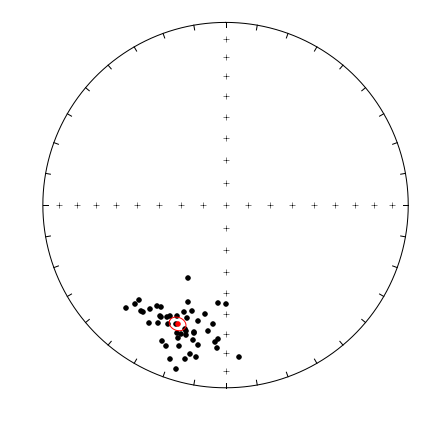

In [20]:
declinations, inclinations = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30, DIBlock=False)

plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],color='r')

## Flip polarity of paleomagnetic data (kind of silly to modulate this, but...)

Let's resolve the antipodes of the Fisher-distributed directions we just created using the function flip() function.

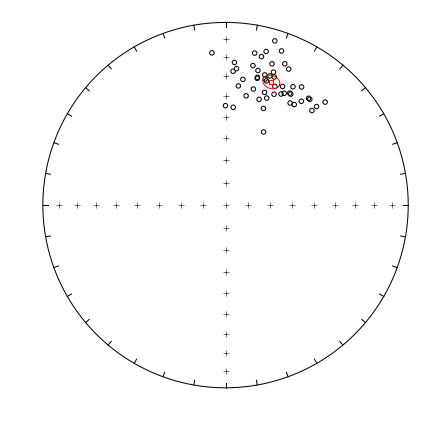

In [21]:
# get reversed directions
reverse = ipmag.flip(ipmag.make_di_block(declinations,inclinations))
rev_directions = pd.DataFrame(reverse,columns=['dec','inc','length'])

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(rev_directions.dec,rev_directions.inc)

# plot the directions in opposite polarity
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(rev_directions.dec, rev_directions.inc)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

## Working with anisotropy data

In [22]:
aniso_data = pd.read_csv('./PmagPy_Datafiles/ani_depthplot/rmag_anisotropy.txt',delimiter='\t',skiprows=1)
aniso_data.head()

,anisotropy_n,anisotropy_s1,anisotropy_s2,anisotropy_s3,anisotropy_s4,anisotropy_s5,anisotropy_s6,anisotropy_sigma,anisotropy_tilt_correction,anisotropy_type,anisotropy_unit,er_analyst_mail_names,er_citation_names,er_location_name,er_sample_name,er_site_name,er_specimen_name,magic_method_codes
0,192,0.332294,0.332862,0.334844,-0.000048,0.000027,-0.000263,0.000122,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,LP-X:AE-H:LP-AN-MS:SO-V
1,192,0.333086,0.332999,0.333916,-0.000262,-0.000322,0.000440,0.000259,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,LP-X:AE-H:LP-AN-MS:SO-V
2,192,0.333750,0.332208,0.334041,-0.000699,0.000663,0.002888,0.000093,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,LP-X:AE-H:LP-AN-MS:SO-V
3,192,0.330565,0.333928,0.335507,0.000603,0.000212,-0.000932,0.000198,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,LP-X:AE-H:LP-AN-MS:SO-V
4,192,0.332747,0.332939,0.334314,-0.001516,-0.000311,-0.000099,0.000162,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,LP-X:AE-H:LP-AN-MS:SO-V


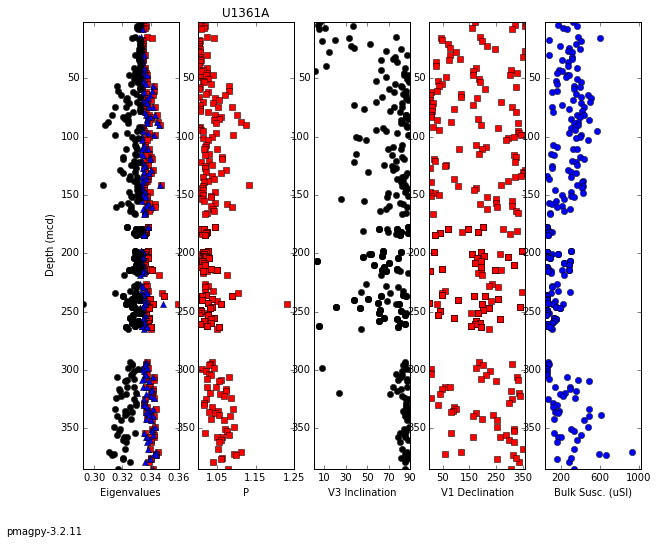

In [23]:
ipmag.aniso_depthplot(dir_path='./PmagPy_Datafiles/ani_depthplot/');

## Working with apparent polar wander paths

PmagPy features an apparent polar wander path (APWP) database for individual plates that goes back to 200 million years. A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with these paleomagnetic poles.

In [60]:
#THE FOLLOWING SHOULD PROBABLY BE INTEGRATED INTO THE GET_PLATE_DATA FUNCTION SO THAT OUTPUT IS EASIER TO WORK WITH

NA_poles_readin = pmag.get_plate_data('NA')
# take care of some formatting -- pole list is output as a string
NA_poles = NA_poles_readin.split('\n')[1:-1]
#create empty Data Frame
NA_poles_list = pd.DataFrame(columns=['age','Plat','Plong'])

NA_poles_new = []
for pole in NA_poles:
    pole_values = pole.split()
    NA_poles_list.ix[pole_values[0]] = pd.Series({'age':float(pole_values[0]),
                                                  'Plat':float(pole_values[1]),
                                                  'Plong':float(pole_values[2])})
    NA_poles_new.append(pole_values)
NA_poles_list.reset_index(inplace=True,drop='index')
NA_poles_list.head()

,age,Plat,Plong
0,0,90.00,0.00
1,1,88.33,180.70
2,2,86.67,180.70
3,3,86.14,175.33
4,4,85.95,173.39


In [25]:
NA_poles_list.dtypes

age      float64
Plat     float64
Plong    float64
dtype: object

TypeError: Not implemented for this type

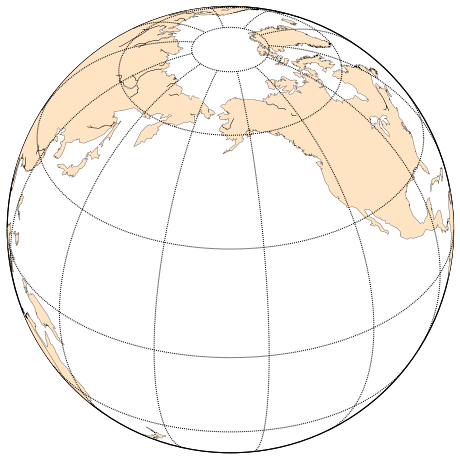

In [26]:
# DO NOT UNDERSTAND WHY THIS IS NOT WORKING

from mpl_toolkits.basemap import Basemap

m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

age = 0
for n in NA_poles_new:
    pmap = ipmag.plot_pole_colorbar(m, float(n[2]),float(n[1]),10.0,-age,-200,0)
   

m.colorbar(pmap,location='bottom',pad="5%",label='Age of magnetization (Ma)')
plt.legend()
#plt.savefig('Code_output/site_VGP_with_Laurentia_Pole_Compilation_colorbar.pdf')
plt.show()

## chi_magic.py

In [90]:
def chi_magic(path_to_file = '.',file_name = 'magic_measurements.txt'):
    """
    NAME
        chi_magic.py

    DESCRIPTION
        plots magnetic susceptibility as a function of frequency and temperature and AC field

    SYNTAX
        chi_magic.py [command line options]

    OPTIONS
        -h prints help message and quits
        -i allows interactive setting of FILE and temperature step
        -f FILE, specify magic_measurements format file
        -T IND, specify temperature step to plot
        -e EXP, specify experiment name to plot

    DEFAULTS
         FILE: magic_measurements.txt
         IND: first 
         SPEC: step through one by one
    """
    cont,FTinit,BTinit,k="",0,0,0
    complete_path = os.path.join(path_to_file,file_name)
    #sys.path.insert(0,path_to_insert)
#     meas_file = file_name
#     spec=""
#     Tind,cont=0,""
    EXP=""
#     fmt='svg' # default image type for saving
#     if '-h' in sys.argv:
#         print main.__doc__
#         sys.exit()
#     if '-i' in sys.argv:
#         file=raw_input("Input magic_measurements file name? [magic_measurements.txt]  ")
#         if file!="":meas_file=file
#     if '-e' in sys.argv:
#         ind=sys.argv.index('-e')
#         EXP=sys.argv[ind+1]
#     if '-f' in sys.argv:
#         ind=sys.argv.index('-f')
#         meas_file=sys.argv[ind+1]
#     if '-T' in sys.argv:
#         ind=sys.argv.index('-T')
#         Tind=int(sys.argv[ind+1])
    #
    meas_data,file_type=pmag.magic_read(complete_path)
    #
    # get list of unique experiment names
    #
    # initialize some variables (a continuation flag, plot initialization flags and the experiment counter
    experiment_names=[]
    for rec in meas_data:
        if rec['magic_experiment_name'] not in experiment_names:experiment_names.append(rec['magic_experiment_name'])
    #
    # hunt through by experiment name
    if EXP!="":
        try:
            k=experiment_names.index(EXP)
        except:
            print "Bad experiment name"
            sys.exit()
    while k < len(experiment_names):
        e=experiment_names[k]
        if EXP=="":print e, k+1 , 'out of ',len(experiment_names)
    #
    #  initialize lists of data, susceptibility, temperature, frequency and field
        X,T,F,B=[],[],[],[]
        for rec in meas_data:
            methcodes=rec['magic_method_codes']
            meths=methcodes.strip().split(':')
            if rec['magic_experiment_name']==e and "LP-X" in meths: # looking for chi measurement
                if 'measurement_temp' not in rec.keys():rec['measurement_temp']='300' # set defaults
                if 'measurement_freq' not in rec.keys():rec['measurement_freq']='0' # set defaults
                if 'measurement_lab_field_ac' not in rec.keys():rec['measurement_lab_field_ac']='0' # set default
                X.append(float(rec['measurement_x']))
                T.append(float(rec['measurement_temp']))
                F.append(float(rec['measurement_freq']))
                B.append(float(rec['measurement_lab_field_ac']))
    #
    # get unique list of Ts,Fs, and Bs
    #
        Ts,Fs,Bs=[],[],[]
        for k in range(len(X)):   # hunt through all the measurements
            if T[k] not in Ts:Ts.append(T[k])  # append if not in list
            if F[k] not in Fs:Fs.append(F[k])
            if B[k] not in Bs:Bs.append(B[k])
        Ts.sort() # sort list of temperatures, frequencies and fields
        Fs.sort()
        Bs.sort()
        if '-x' in sys.argv:
            k=len(experiment_names)+1 # just plot the one
        else:
            k+=1  # increment experiment number
    #
    # plot chi versus T and F holding B constant
    #  
        plotnum=1  # initialize plot number to 1
        if len(X)>2:  # if there are any data to plot, continue
            b=Bs[-1]  # keeping field constant and at maximum
            XTF=[] # initialize list of chi versus Temp and freq
            for f in Fs:   # step through frequencies sequentially
                XT=[]  # initialize list of chi versus temp
                for kk in range(len(X)): # hunt through all the data
                    if F[kk]==f and B[kk]==b:  # select data with given freq and field
                        XT.append([X[kk],T[kk]]) # append to list
                XTF.append(XT) # append list to list of frequencies
            if len(XT)>1: # if there are any temperature dependent data
                plt.figure(num=plotnum,figsize=(5,5)) # initialize plot
                pmagplotlib.plotXTF(plotnum,XTF,Fs,e,b) # call the plotting function
                pmagplotlib.drawFIGS({'fig':plotnum})
                plotnum+=1 # increment plot number
            f=Fs[0] # set frequency to minimum
            XTB=[] # initialize list if chi versus Temp and field
            for b in Bs:  # step through field values
                XT=[] # initial chi versus temp list for this field
                for kk in range(len(X)): # hunt through all the data
                    if F[kk]==f and B[kk]==b: # select data with given freq and field  
                        XT.append([X[kk],T[kk]]) # append to list
                XTB.append(XT)
            if len(XT)>1: # if there are any temperature dependent data
                plt.figure(num=plotnum,figsize=(5,5)) # set up plot
                pmagplotlib.plotXTB(plotnum,XTB,Bs,e,f) # call the plotting function
                pmagplotlib.drawFIGS({'fig':plotnum})
                plotnum+=1 # increment plot number
            if '-i' in sys.argv: 
                for ind in range(len(Ts)):  # print list of temperatures available
                    print ind,int(Ts[ind]) 
                cont=raw_input("Enter index of desired temperature step, s[a]ve plots, [return] to quit ")
                if cont=='a':
                        files={}
                        PLTS={}
                        for p in range(1,plotnum):
                            key=str(p)
                            files[key]=e+'_'+key+'.'+fmt
                            PLTS[key]=key
                        pmagplotlib.saveP(PLTS,files)
                        cont=raw_input("Enter index of desired temperature step, s[a]ve plots, [return] to quit ")
                if cont=="":cont='q'
            while cont!="q":
                if '-i' in sys.argv:Tind=int(cont) # set temperature index
                b=Bs[-1] # set field to max available
                XF=[] # initial chi versus frequency list
                for kk in range(len(X)): # hunt through the data
                    if T[kk]==Ts[Tind] and B[kk]==b:  # if temperature and field match,
                        XF.append([X[kk],F[kk]]) # append the data
                if len(XF)>1: # if there are any data to plot
                    if FTinit==0: # if not already initialized, initialize plot
                        plt.figure(num=plotnum,figsize=(5,5))
                        FTinit=1 
                        XFplot=plotnum
                        plotnum+=1 # increment plotnum
                    pmagplotlib.plotXFT(XFplot,XF,Ts[Tind],e,b)
                    pmagplotlib.drawFIGS({'fig':plotnum})
                else:
                    print '\n *** Skipping susceptibitily-frequency plot as a function of temperature *** \n'
                f=Fs[0] # set frequency to minimum available
                XB=[] # initialize chi versus field list
                for kk in range(len(X)): # hunt through the data
                    if T[kk]==Ts[Tind] and F[kk]==f:  # if temperature and field match those desired
                        XB.append([X[kk],B[kk]]) # append the data to list
                if len(XB)>1: # if there are any data
                    if BTinit==0: # if plot not already initialized
                        plt.figure(num=plotnum,figsize=(5,5)) # do it
                        BTinit=1 
                    pmagplotlib.plotXBT(plotnum,XB,Ts[Tind],e,f) # and call plotting function 
                    pmagplotlib.drawFIGS({'fig':plotnum})
                else:
                    print 'Skipping susceptibitily - AC field plot as a function of temperature'
                if '-i' in sys.argv:
                    for ind in range(len(Ts)): # just in case you forgot, print out a new list of temperatures
                        print ind,int(Ts[ind]) 
                    cont=raw_input("Enter index of next temperature step, s[a]ve plots,  [return] to quit ") # ask for new temp
                    if cont=="":sys.exit()
                    if cont=='a':
                        files={}
                        PLTS={}
                        for p in range(1,plotnum):
                            key=str(p)
                            files[key]=e+'_'+key+'.'+fmt
                            PLTS[key]=p
                        pmagplotlib.saveP(PLTS,files)
                        cont=raw_input("Enter index of desired temperature step, s[a]ve plots, [return] to quit ")
                        if cont=="":sys.exit()
                else:
                    ans=raw_input("enter s[a]ve to save files,  [return] to quit ")
                    if ans=='a': 
                        files={}
                        PLTS={}
                        for p in range(1,plotnum):
                            key=str(p)
                            files[key]=e+'_'+key+'.'+fmt
                            PLTS[key]=p
                        pmagplotlib.saveP(PLTS,files)
                        sys.exit()
                    else:
                        sys.exit()

IRM-Kappa-2352 1 out of  2
IRM-OldBlue-1892 2 out of  2


UnboundLocalError: local variable 'Tind' referenced before assignment

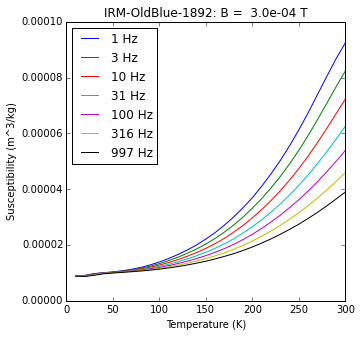

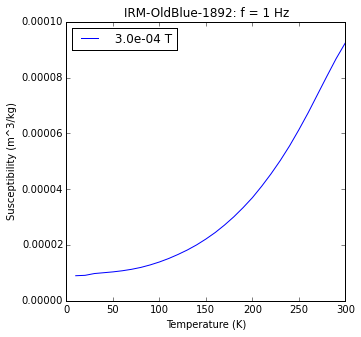

In [91]:
chi_magic(path_to_file='./PmagPy_Datafiles/chi_magic/',file_name='chi_magic_example.dat')

## curie.py